In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from dtaidistance import dtw
from sklearn.metrics import silhouette_score, davies_bouldin_score

import utils
import predictive_clustering
import predictive_plots

### Prediction on Rating0 differenciated by Match and Emotion on RETOS & BEBRASK using Time Series


In [2]:
data = pd.read_excel("RETOS_BEBRASK_Rating0_Time_Series.xlsx")
data

,Subject ID,Happy_0_0,Happy_0_1,Happy_0_2,Happy_0_3,Happy_0_4,Happy_0_5,Happy_1_0,Happy_1_1,Happy_1_2,...,Fear_0_5,Fear_1_0,Fear_1_1,Fear_1_2,Fear_1_3,Fear_1_4,Fear_1_5,Fear_1_6,Fear_1_7,Fear_1_8
0,PREDWELL_RETOS-1001-1,4,1,1,1,1,1,4,4,4,...,3,4,1,3,2,3,4,3,3,4
1,PREDWELL_RETOS-1002-1,1,1,3,1,1,1,3,4,4,...,1,3,1,3,4,3,4,2,3,4
2,PREDWELL_RETOS-1003-1,1,1,1,1,1,1,3,3,4,...,2,2,2,3,2,2,2,1,3,3
3,PREDWELL_RETOS-1004-1,1,1,3,3,2,1,1,4,2,...,2,2,4,3,1,3,3,2,1,3
4,PREDWELL_RETOS-1005-1,1,1,1,1,2,1,4,3,4,...,1,2,2,2,3,3,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,PREDWELL_RETOS-5-1,2,2,1,1,1,1,3,4,4,...,1,1,1,4,2,4,3,3,2,2
145,PREDWELL_RETOS-6-1,1,2,1,1,1,1,3,3,4,...,1,2,2,2,4,2,3,2,4,4
146,PREDWELL_RETOS-7-1,1,1,1,1,1,1,3,4,2,...,4,4,1,2,4,4,1,4,4,1
147,PREDWELL_RETOS-8-1,1,1,1,1,1,1,4,4,1,...,3,3,3,4,3,2,4,2,1,3


In [3]:
scales_BEBRASK = pd.read_excel("../Datasets/RETOS_scales.xlsx")
scales_RETOS = pd.read_excel("../Datasets/BEBRASK_scales.xlsx")
scales = pd.concat([scales_BEBRASK, scales_RETOS])

#Removing PREDWELL_RETOS-307-1 that has different number of answers per emotion, and converting columns to numerical and coercing errors to NaN.
scales = scales.query("EPRIME_CODE != 'PREDWELL_RETOS-307-1'")
cols = scales.columns
scales[cols[3:]] = scales[cols[3:]].apply(pd.to_numeric, errors='coerce')

In [4]:
temporal_happy_0 = data[["Subject ID","Happy_0_0","Happy_0_1","Happy_0_2","Happy_0_3","Happy_0_4","Happy_0_5"]]
temporal_happy_1 = data[["Subject ID","Happy_1_0","Happy_1_1","Happy_1_2","Happy_1_3","Happy_1_4","Happy_1_5","Happy_1_6","Happy_1_7","Happy_1_8"]]
temporal_fear_0 = data[["Subject ID","Fear_0_0","Fear_0_1","Fear_0_2","Fear_0_3","Fear_0_4","Fear_0_5"]]
temporal_fear_1 = data[["Subject ID","Fear_1_0","Fear_1_1","Fear_1_2","Fear_1_3","Fear_1_4","Fear_1_5","Fear_1_6","Fear_1_7","Fear_1_8"]]
temporal_sad_0 = data[["Subject ID","Sad_0_0","Sad_0_1","Sad_0_2","Sad_0_3","Sad_0_4","Sad_0_5"]]
temporal_sad_1 = data[["Subject ID","Sad_1_0","Sad_1_1","Sad_1_2","Sad_1_3","Sad_1_4","Sad_1_5","Sad_1_6","Sad_1_7","Sad_1_8"]]

In [14]:
PANAS = ["PA", "NA."]
ERQ = ["ERQ_CR", "ERQ_ES"]
UPPSP = ["UPPSP_NU", "UPPSP_PU", "UPPSP_SS", "UPPSP_PMD", "UPPSP_PSV"]
BIS_BAS = ["BIS", "BAS_D", "BAS_RR", "BAS_FS"]
TEPS = ["TEPS_AF", "TEPS_CF"]
SHS = ["SHS"]
FS = ["FS"]
LOTR = ["LOT_R"]
RRQ = ["RRQ_Rum", "RRQ_Ref"]
ASI3 = ["ASI_P", "ASI_C", "ASI_S"]
SPQ = ["SPQ", "SPQ_IR"]
MSSB = ["MSSB_POS", "MSSB_NEG", "MSSB_DES"]

list_metrics = [PANAS, ERQ, UPPSP, BIS_BAS, TEPS, SHS, FS, LOTR, RRQ, ASI3, SPQ, MSSB]

## Hierarchical Clustering using Dynamic Time Warping
#### Happy Match

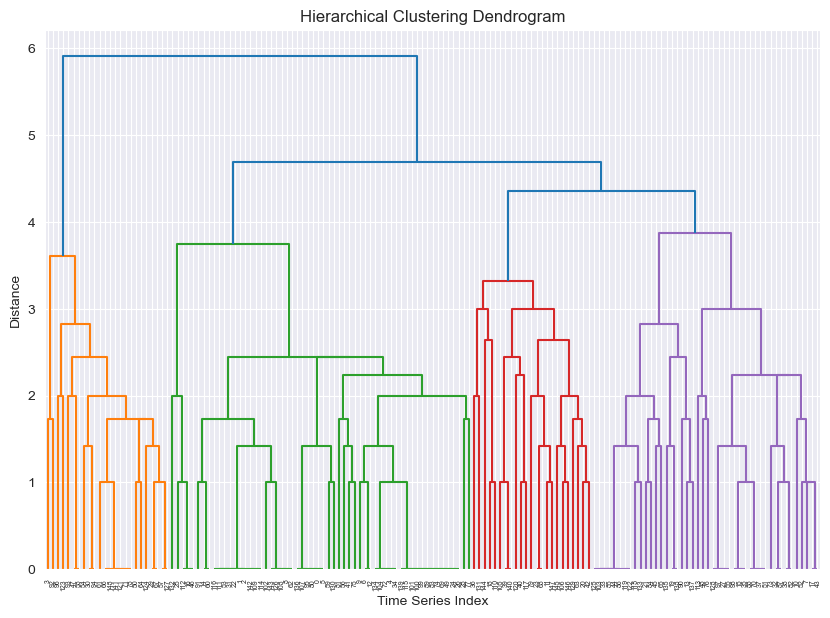

In [5]:
ts_data = temporal_happy_1.drop(["Subject ID"], axis=1).to_numpy()
params = {'method':'complete'}
Z = predictive_clustering.hierarchical_clustering_ts(ts_data,dtw.distance_matrix_fast,params=params)

In [6]:
params_clust = {'t':4,'criterion':'maxclust'}
cluster_data_happy1 =  predictive_clustering.create_cluster_df(Z,temporal_happy_1,params = params_clust)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_happy1["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_happy1["clusters"]))


Silhouette score: 0.007404144429389919
Davies-Bouldin score: 6.016899429795696


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\predictive_clustering.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_df.copy()


In [13]:
#Creationt of the 
name_output = f"time_series_happy_match.docx"
new_data = pd.merge(scales.copy(),cluster_data_happy1.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID",axis=1,inplace=True)

df = utils.filter_data(new_data)

utils.create_word(df,list_metrics, name_output)

In [84]:
output_name = f'Clusters_TimeSeries/time_series_predictive_processing_happy_match_clusters.xlsx'
utils.export_clusters_df(cluster_data_happy1,output_name)


In [85]:
# Scales Metrics
utils.create_metrics_cluster_df(cluster_data_happy1,scales)

,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,ZKPQ_ACT_mean,ZKPQ_SY_mean,ZKPQ_IMPSS_mean,ZKPQ_AGG_HOST_mean,ZKPQ_INFREQ_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,32.46,19.50,4.82,2.90,8.50,10.42,9.96,8.29,7.42,21.25,...,8.72,8.56,8.17,6.33,1.33,2.33,3.06,2.17,1.89,1.83
2,33.62,19.31,4.97,3.22,8.29,9.50,11.03,6.91,6.88,21.43,...,7.56,6.35,9.19,6.56,1.81,2.07,2.41,1.65,1.83,1.67
3,32.74,21.13,5.08,3.00,9.35,9.96,10.61,8.00,7.35,22.52,...,8.07,7.20,8.53,7.13,1.13,2.70,2.65,1.60,2.15,3.25
4,33.43,21.48,4.73,2.88,9.64,9.95,11.23,7.27,6.91,21.61,...,8.87,6.96,9.29,7.00,1.60,2.08,2.81,2.36,1.86,2.72


In [86]:
#Means tasks
utils.create_mean_tasks(data,cluster_data_happy1)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,2.0,1.229885,3.626437,1.744253,2.888889,1.853448,2.758621
1,1.0,1.236111,3.162037,1.694444,2.541667,1.715278,2.606481
2,4.0,1.204545,3.383838,1.731061,2.729798,1.795455,2.734848
3,3.0,1.166667,3.246377,1.717391,2.782609,1.789855,2.661836


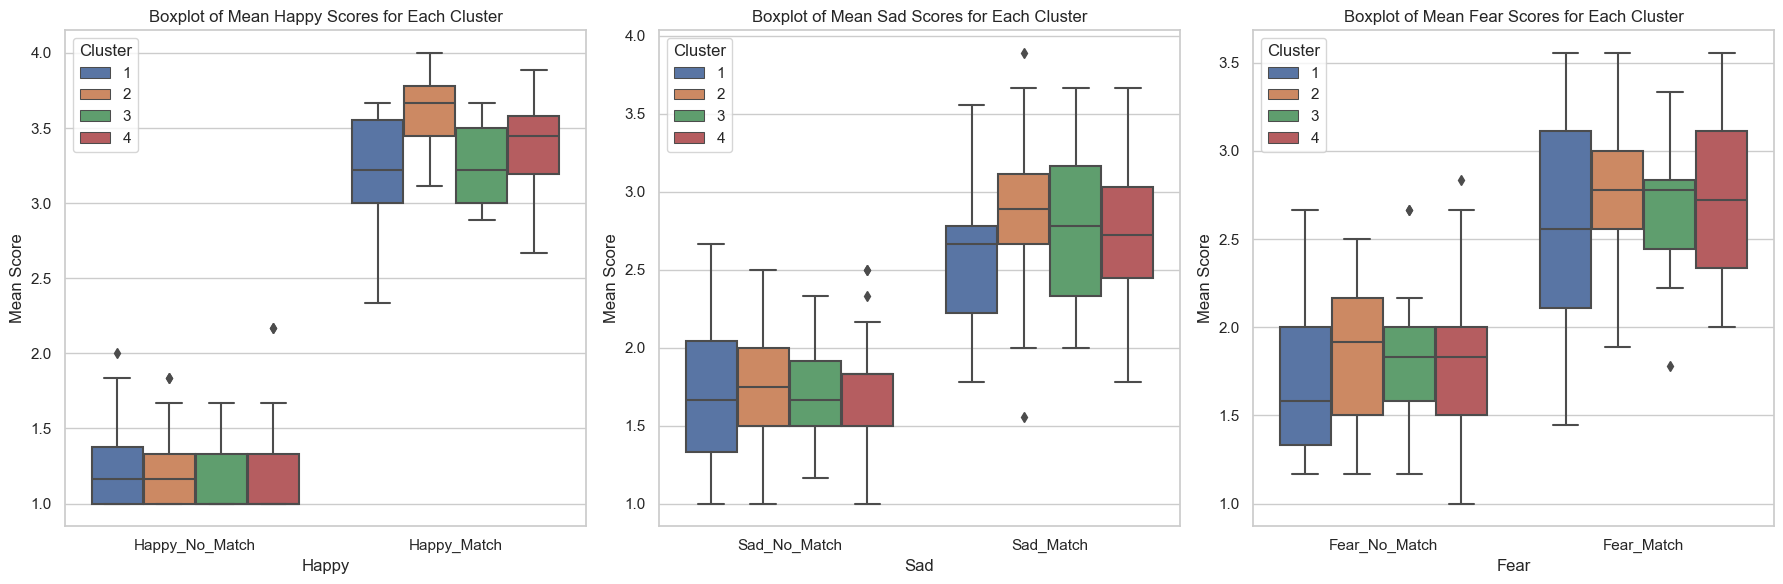

In [87]:
#Boxplots tasks
#create_boxplots(data,cluster_data_happy1)

#### Happy Non Match


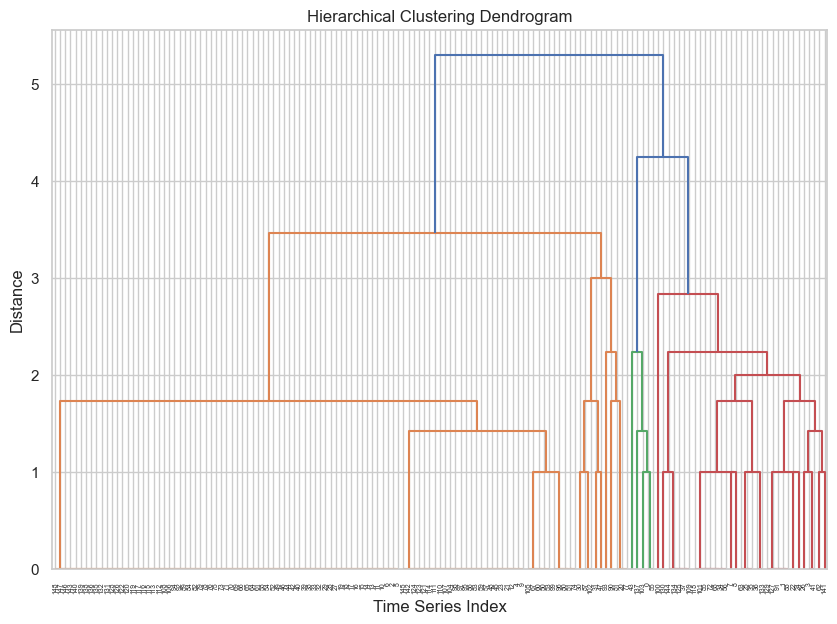

In [88]:
time_series_data = temporal_happy_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix_happy0 = dtw.distance_matrix_fast(time_series_data)

distance_matrix_happy0 = distance_matrix_happy0.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix_happy0)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [89]:
cluster_data_happy0 = utils.create_cluster_df(Z, 3, temporal_happy_0)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_happy0["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_happy0["clusters"]))


Silhouette score: 0.02044712570646001
Davies-Bouldin score: 6.376322824837078


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\utils.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_happy_match


In [90]:
sns.set(style="whitegrid")

    
name_output = f"time_series_happy_no_match.docx"


new_data = pd.merge(scales.copy(),cluster_data_happy0.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID",axis=1,inplace=True)
numeric_columns = new_data.select_dtypes(include=[np.number]).columns
columns_to_select = ['EPRIME_CODE'] + list(numeric_columns) + ["ERQ_ES"] + ["UPPSP_PMD"]
new_data = new_data[new_data["clusters"] != -1]

# Selecting all numeric columns along with "Subject"
filtered_df = new_data[columns_to_select]
cols_to_drop = filtered_df.columns[filtered_df.isnull().sum() > 50]
filtered_df = filtered_df.drop(columns=cols_to_drop).copy()
filtered_df.drop("Age", axis=1, inplace=True)


doc = Document()
size_clust = np.unique(new_data["clusters"], return_counts=True)[1]

for idx, group in enumerate(list_metrics):
    # Add group name to the document
    doc.add_paragraph(f"Group {idx + 1}: {', '.join(group)}")

    # Select columns belonging to the group
    columns_to_plot = ['clusters'] + group
    group_df = filtered_df[columns_to_plot]

    # Melt the dataframe
    melted_df = pd.melt(group_df, id_vars=['clusters'], value_vars=group,
                        var_name='Variable', value_name='Mean_Score')
    
    num_cols = len(group)
    for i, variable in enumerate(group):
        # Create a new figure for each variable
        plt.figure(figsize=(8, 6))
        ax = plt.gca()

        # Plot boxplot for the current variable
        sns.boxplot(x='clusters', y='Mean_Score', data=melted_df[melted_df['Variable'] == variable], ax=ax)
        ax.set_title(f'Boxplot for {variable}')
        ax.set_xlabel('Clusters')
        ax.set_ylabel('Mean Score')
        ax.grid(True)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

        # Calculate mean
        means = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].mean()
        stats = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].agg(['size', 'mean', 'std'])
        
        # Add text annotation for mean below the boxplot
        for cluster, mean in enumerate(means):
            ax.text(cluster, mean, f'{mean:.2f}', ha='center', va='top', color='red')

        plt.tight_layout()
        plot_filename = f'plot_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(plot_filename)
        plt.close()

        # Generate table for statistics
        stats.reset_index(inplace=True)
        stats["clusters"] = stats["clusters"]
        stats["mean"] = stats["mean"].round(2)
        stats["std"] = stats["std"].round(2)
        stats['SE of Cluster'] = (stats['std'] / np.sqrt(stats['size'])).round(2)
        stats['size'] = size_clust

        stats.columns = ["Number of Cluster", "Size of Cluster", "Mean of Cluster", "Standard Deviation of Cluster",
                         "SE of Cluster"]

        plt.figure(figsize=(8, 2))
        table = plt.table(cellText=stats.drop("Standard Deviation of Cluster", axis=1).values,
                          colLabels=stats.drop("Standard Deviation of Cluster", axis=1).columns,
                          cellLoc='center',
                          loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1)
        table.auto_set_column_width([i for i in range(len(stats.columns))])
        plt.axis('off')
        plt.title(f'Statistics for {variable}')
        table_filename = f'table_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(table_filename)
        plt.close()
        
            # Add plot and table to the Word document in the same row
        table_cell = doc.add_table(rows=1, cols=2)
        table_row = table_cell.rows[0]
        cell1 = table_row.cells[0]
        cell2 = table_row.cells[1]
        
        cell1.paragraphs[0].add_run().add_picture(plot_filename, width=Inches(3))  # Adjust width as needed
        cell2.paragraphs[0].add_run().add_picture(table_filename, width=Inches(3))  # Adjust width as 
doc.save(name_output)


In [91]:
export_df = cluster_data_happy0.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_happy_non_match_clusters.xlsx'
export_df.to_excel(name_excel, index=False)


In [92]:
# Scales Metrics
cluster_metrics_happy0 = create_metrics_cluster_df(cluster_data_happy0,scales)
cluster_metrics_happy0


,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,ZKPQ_ACT_mean,ZKPQ_SY_mean,ZKPQ_IMPSS_mean,ZKPQ_AGG_HOST_mean,ZKPQ_INFREQ_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,33.90,19.68,4.96,2.91,8.67,9.68,10.89,7.45,7.12,21.36,...,8.16,7.12,9.03,6.77,1.52,2.09,2.64,1.90,1.85,1.99
2,35.20,21.60,5.00,3.55,8.80,9.20,11.20,6.00,5.00,21.80,...,8.33,6.67,9.00,4.33,1.33,2.33,3.00,3.67,2.00,2.33
3,30.73,22.00,4.66,3.36,9.64,10.52,10.67,7.48,7.12,22.48,...,8.32,7.06,8.47,6.90,1.70,2.68,2.72,1.84,2.08,3.32


In [93]:
#Means tasks
create_mean_tasks(data,cluster_data_happy0)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,2.0,1.633333,3.577778,1.966667,3.066667,2.100000,2.977778
1,3.0,1.444444,3.457912,1.772727,2.777778,1.868687,2.801347
2,1.0,1.126126,3.403403,1.704204,2.753754,1.771772,2.673674


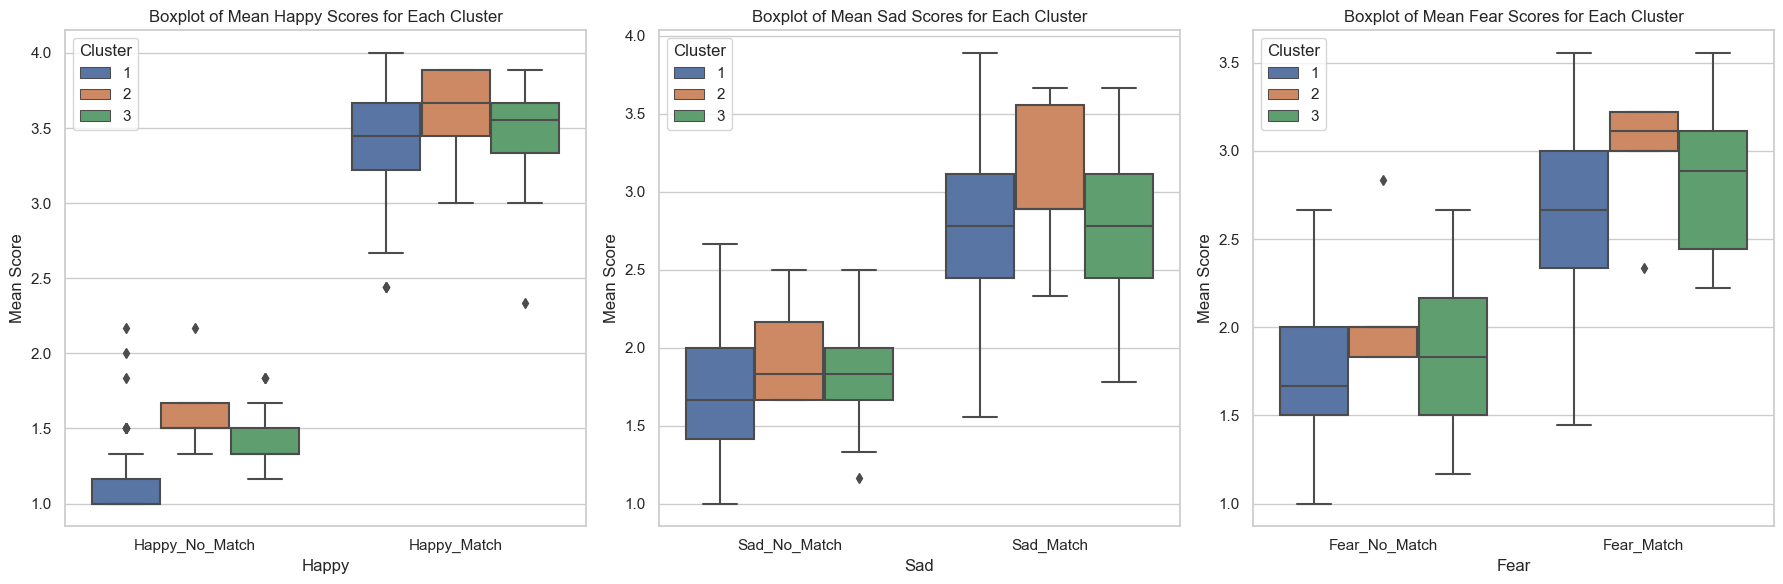

In [94]:
#Boxplots tasks
create_boxplots(data,cluster_data_happy0)


#### Fear Match

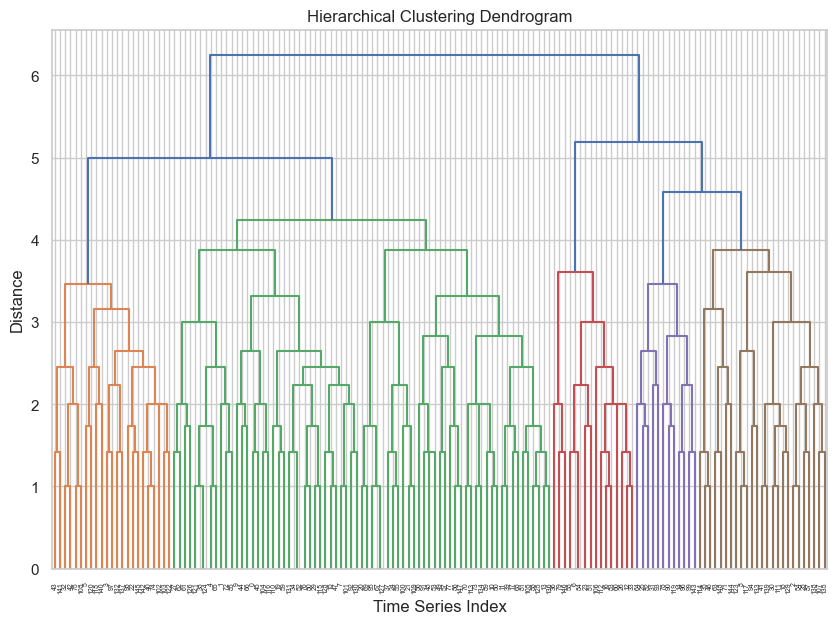

In [95]:
time_series_data = temporal_fear_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix_fear1 = dtw.distance_matrix_fast(time_series_data)

distance_matrix_fear1 = distance_matrix_fear1.astype(np.float64)


condensed_dist_matrix = squareform(distance_matrix_fear1)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()
#### Fear No Match

In [96]:
cluster_data_fear1 = utils.create_cluster_df(Z, 5, temporal_fear_1)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_fear1["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_fear1["clusters"]))


Silhouette score: 0.0072837152120460895
Davies-Bouldin score: 4.851453784363998


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\utils.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_happy_match


In [97]:
sns.set(style="whitegrid")

    
name_output = f"time_series_fear_match.docx"


new_data = pd.merge(scales.copy(),cluster_data_fear1.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID",axis=1,inplace=True)
numeric_columns = new_data.select_dtypes(include=[np.number]).columns
columns_to_select = ['EPRIME_CODE'] + list(numeric_columns) + ["ERQ_ES"] + ["UPPSP_PMD"]
new_data = new_data[new_data["clusters"] != -1]

# Selecting all numeric columns along with "Subject"
filtered_df = new_data[columns_to_select]
cols_to_drop = filtered_df.columns[filtered_df.isnull().sum() > 50]
filtered_df = filtered_df.drop(columns=cols_to_drop).copy()
filtered_df.drop("Age", axis=1, inplace=True)


doc = Document()
size_clust = np.unique(new_data["clusters"], return_counts=True)[1]

for idx, group in enumerate(list_metrics):
    # Add group name to the document
    doc.add_paragraph(f"Group {idx + 1}: {', '.join(group)}")

    # Select columns belonging to the group
    columns_to_plot = ['clusters'] + group
    group_df = filtered_df[columns_to_plot]

    # Melt the dataframe
    melted_df = pd.melt(group_df, id_vars=['clusters'], value_vars=group,
                        var_name='Variable', value_name='Mean_Score')
    
    num_cols = len(group)
    for i, variable in enumerate(group):
        # Create a new figure for each variable
        plt.figure(figsize=(8, 6))
        ax = plt.gca()

        # Plot boxplot for the current variable
        sns.boxplot(x='clusters', y='Mean_Score', data=melted_df[melted_df['Variable'] == variable], ax=ax)
        ax.set_title(f'Boxplot for {variable}')
        ax.set_xlabel('Clusters')
        ax.set_ylabel('Mean Score')
        ax.grid(True)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

        # Calculate mean
        means = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].mean()
        stats = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].agg(['size', 'mean', 'std'])
        
        # Add text annotation for mean below the boxplot
        for cluster, mean in enumerate(means):
            ax.text(cluster, mean, f'{mean:.2f}', ha='center', va='top', color='red')

        plt.tight_layout()
        plot_filename = f'plot_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(plot_filename)
        plt.close()

        # Generate table for statistics
        stats.reset_index(inplace=True)
        stats["clusters"] = stats["clusters"]
        stats["mean"] = stats["mean"].round(2)
        stats["std"] = stats["std"].round(2)
        stats['SE of Cluster'] = (stats['std'] / np.sqrt(stats['size'])).round(2)
        stats['size'] = size_clust

        stats.columns = ["Number of Cluster", "Size of Cluster", "Mean of Cluster", "Standard Deviation of Cluster",
                         "SE of Cluster"]

        plt.figure(figsize=(8, 2))
        table = plt.table(cellText=stats.drop("Standard Deviation of Cluster", axis=1).values,
                          colLabels=stats.drop("Standard Deviation of Cluster", axis=1).columns,
                          cellLoc='center',
                          loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1)
        table.auto_set_column_width([i for i in range(len(stats.columns))])
        plt.axis('off')
        plt.title(f'Statistics for {variable}')
        table_filename = f'table_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(table_filename)
        plt.close()
        
            # Add plot and table to the Word document in the same row
        table_cell = doc.add_table(rows=1, cols=2)
        table_row = table_cell.rows[0]
        cell1 = table_row.cells[0]
        cell2 = table_row.cells[1]
        
        cell1.paragraphs[0].add_run().add_picture(plot_filename, width=Inches(3))  # Adjust width as needed
        cell2.paragraphs[0].add_run().add_picture(table_filename, width=Inches(3))  # Adjust width as 
doc.save(name_output)


In [98]:
export_df = cluster_data_fear1.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_fear_match_clusters.xlsx'
export_df.to_excel(name_excel, index=False)


In [99]:
# Scales Metrics
cluster_metrics_fear1 = create_metrics_cluster_df(cluster_data_fear1,scales)
cluster_metrics_fear1


,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,ZKPQ_ACT_mean,ZKPQ_SY_mean,ZKPQ_IMPSS_mean,ZKPQ_AGG_HOST_mean,ZKPQ_INFREQ_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,35.30,20.87,5.02,3.16,8.91,10.22,12.17,7.82,6.65,21.57,...,10.27,6.43,11.00,6.56,2.00,2.22,2.00,1.89,1.56,1.67
2,33.22,20.25,4.92,2.86,8.89,9.84,10.78,7.45,7.08,21.38,...,7.95,7.23,8.58,6.62,1.49,1.93,2.60,1.76,1.69,1.95
3,33.19,21.38,4.91,3.64,8.06,9.06,10.38,6.69,7.12,22.62,...,8.38,7.00,8.00,6.50,1.00,3.07,3.21,1.71,2.93,2.07
4,31.00,20.08,4.64,2.77,9.25,9.83,9.25,8.00,7.50,21.42,...,7.33,6.89,9.44,6.75,1.33,2.18,3.00,2.36,1.18,2.82
5,32.52,19.12,4.83,3.15,9.20,10.08,10.92,7.08,7.04,21.84,...,7.31,7.44,8.06,7.25,1.69,2.47,2.89,2.42,2.53,3.68


In [100]:
#Means tasks
create_mean_tasks(data,cluster_data_fear1)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,2.0,1.203196,3.453577,1.778539,2.858447,1.764840,2.911720
1,5.0,1.220000,3.311111,1.553333,2.680000,1.820000,2.275556
2,1.0,1.260870,3.483092,1.731884,2.748792,1.971014,2.705314
3,3.0,1.145833,3.465278,1.708333,2.881944,1.802083,2.916667
4,4.0,1.263889,3.277778,1.805556,2.305556,1.694444,2.148148


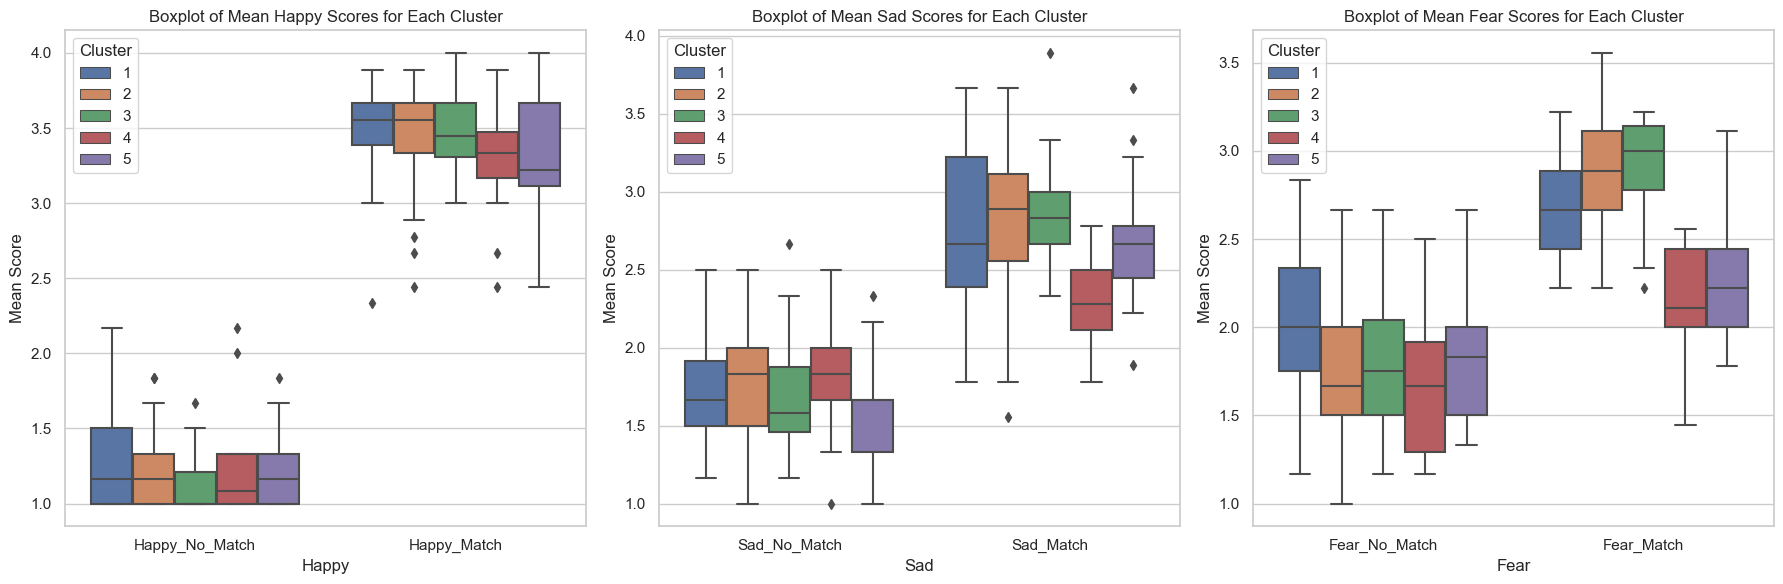

In [101]:
#Boxplots tasks
create_boxplots(data,cluster_data_fear1)

#### Fear No Match

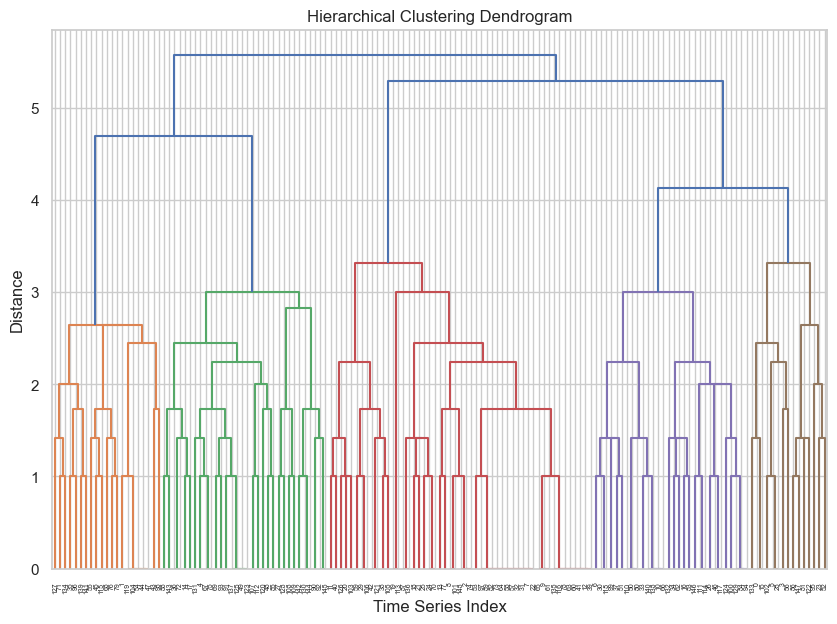

In [102]:
time_series_data = temporal_fear_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix_fear0 = dtw.distance_matrix_fast(time_series_data)

distance_matrix_fear0 = distance_matrix_fear0.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix_fear0)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [103]:
cluster_data_fear0 = utils.create_cluster_df(Z, 5, temporal_fear_0)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_fear0["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_fear0["clusters"]))

#### Fear No Match

Silhouette score: 0.01617464300874908
Davies-Bouldin score: 4.520371634105031


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\utils.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_happy_match


In [104]:
sns.set(style="whitegrid")

    
name_output = f"time_series_fear_no_match.docx"


new_data = pd.merge(scales.copy(),cluster_data_fear0.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID",axis=1,inplace=True)
numeric_columns = new_data.select_dtypes(include=[np.number]).columns
columns_to_select = ['EPRIME_CODE'] + list(numeric_columns) + ["ERQ_ES"] + ["UPPSP_PMD"]
new_data = new_data[new_data["clusters"] != -1]

# Selecting all numeric columns along with "Subject"
filtered_df = new_data[columns_to_select]
cols_to_drop = filtered_df.columns[filtered_df.isnull().sum() > 50]
filtered_df = filtered_df.drop(columns=cols_to_drop).copy()
filtered_df.drop("Age", axis=1, inplace=True)


doc = Document()
size_clust = np.unique(new_data["clusters"], return_counts=True)[1]

for idx, group in enumerate(list_metrics):
    # Add group name to the document
    doc.add_paragraph(f"Group {idx + 1}: {', '.join(group)}")

    # Select columns belonging to the group
    columns_to_plot = ['clusters'] + group
    group_df = filtered_df[columns_to_plot]

    # Melt the dataframe
    melted_df = pd.melt(group_df, id_vars=['clusters'], value_vars=group,
                        var_name='Variable', value_name='Mean_Score')
    
    num_cols = len(group)
    for i, variable in enumerate(group):
        # Create a new figure for each variable
        plt.figure(figsize=(8, 6))
        ax = plt.gca()

        # Plot boxplot for the current variable
        sns.boxplot(x='clusters', y='Mean_Score', data=melted_df[melted_df['Variable'] == variable], ax=ax)
        ax.set_title(f'Boxplot for {variable}')
        ax.set_xlabel('Clusters')
        ax.set_ylabel('Mean Score')
        ax.grid(True)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

        # Calculate mean
        means = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].mean()
        stats = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].agg(['size', 'mean', 'std'])
        
        # Add text annotation for mean below the boxplot
        for cluster, mean in enumerate(means):
            ax.text(cluster, mean, f'{mean:.2f}', ha='center', va='top', color='red')

        plt.tight_layout()
        plot_filename = f'plot_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(plot_filename)
        plt.close()

        # Generate table for statistics
        stats.reset_index(inplace=True)
        stats["clusters"] = stats["clusters"]
        stats["mean"] = stats["mean"].round(2)
        stats["std"] = stats["std"].round(2)
        stats['SE of Cluster'] = (stats['std'] / np.sqrt(stats['size'])).round(2)
        stats['size'] = size_clust

        stats.columns = ["Number of Cluster", "Size of Cluster", "Mean of Cluster", "Standard Deviation of Cluster",
                         "SE of Cluster"]

        plt.figure(figsize=(8, 2))
        table = plt.table(cellText=stats.drop("Standard Deviation of Cluster", axis=1).values,
                          colLabels=stats.drop("Standard Deviation of Cluster", axis=1).columns,
                          cellLoc='center',
                          loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1)
        table.auto_set_column_width([i for i in range(len(stats.columns))])
        plt.axis('off')
        plt.title(f'Statistics for {variable}')
        table_filename = f'table_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(table_filename)
        plt.close()
        
            # Add plot and table to the Word document in the same row
        table_cell = doc.add_table(rows=1, cols=2)
        table_row = table_cell.rows[0]
        cell1 = table_row.cells[0]
        cell2 = table_row.cells[1]
        
        cell1.paragraphs[0].add_run().add_picture(plot_filename, width=Inches(3))  # Adjust width as needed
        cell2.paragraphs[0].add_run().add_picture(table_filename, width=Inches(3))  # Adjust width as 
doc.save(name_output)


In [105]:
export_df = cluster_data_fear0.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_fear_non_match_clusters.xlsx'
export_df.to_excel(name_excel, index=False)

In [106]:
# Scales Metrics
cluster_metrics_fear0 = create_metrics_cluster_df(cluster_data_fear0,scales)
cluster_metrics_fear0


,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,ZKPQ_ACT_mean,ZKPQ_SY_mean,ZKPQ_IMPSS_mean,ZKPQ_AGG_HOST_mean,ZKPQ_INFREQ_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,34.95,20.57,5.06,3.17,9.95,10.29,10.43,6.95,6.24,21.05,...,10.00,5.92,7.86,5.69,2.21,2.06,2.13,1.94,1.88,1.62
2,33.19,19.59,4.93,2.95,8.84,9.75,10.53,7.09,7.28,22.03,...,8.28,7.38,9.28,6.40,1.20,2.23,2.59,2.45,1.45,2.77
3,31.57,20.20,4.92,2.94,9.02,10.22,11.29,7.67,7.10,22.08,...,7.50,6.68,9.04,6.86,1.32,2.07,2.59,1.95,2.11,2.11
4,33.70,20.13,4.71,2.99,8.60,9.17,10.57,7.24,7.33,21.10,...,7.28,7.47,7.89,7.05,1.79,2.58,3.38,1.71,2.42,2.42
5,35.73,21.73,4.87,3.43,7.60,9.60,11.20,8.13,6.93,21.07,...,9.50,8.75,11.50,8.12,1.75,2.21,2.36,1.43,1.07,2.50


In [107]:
#Means tasks
create_mean_tasks(data,cluster_data_fear0)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,5.0,1.244444,3.437037,1.777778,2.674074,2.311111,2.903704
1,1.0,1.269841,3.354497,1.738095,2.899471,2.039683,2.714286
2,3.0,1.160131,3.435730,1.653595,2.642702,1.444444,2.636166
3,2.0,1.229167,3.378472,1.822917,2.871528,1.901042,2.722222
4,4.0,1.233333,3.481481,1.722222,2.833333,1.894444,2.733333


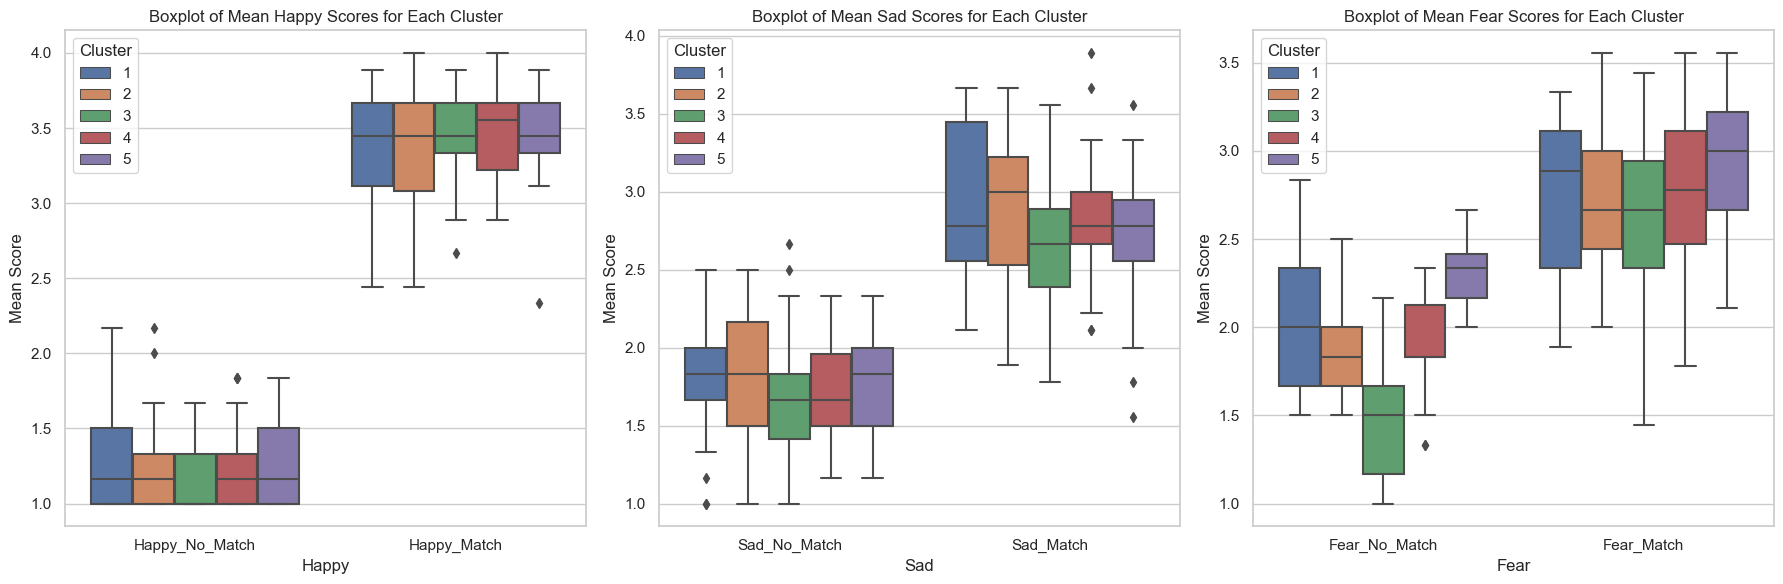

In [108]:
#Boxplots tasks
create_boxplots(data,cluster_data_fear0)


#### Sad Match

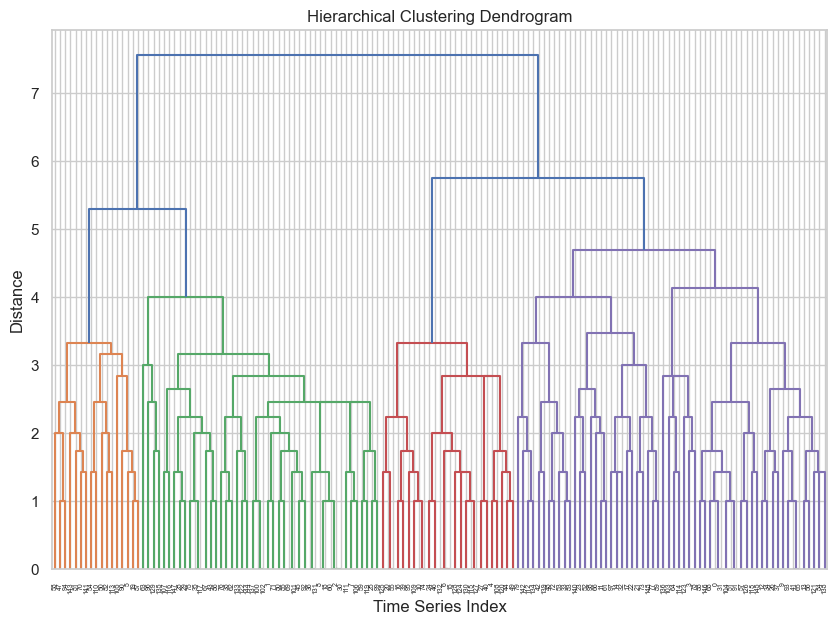

In [109]:
time_series_data = temporal_sad_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix_sad1 = dtw.distance_matrix_fast(time_series_data)

distance_matrix_sad1 = distance_matrix_sad1.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix_sad1)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

In [110]:
cluster_data_sad1 = utils.create_cluster_df(Z, 4, temporal_sad_1)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_sad1["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_sad1["clusters"]))



Silhouette score: 0.010311368790236293
Davies-Bouldin score: 4.914281209295374


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\utils.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_happy_match


In [111]:
sns.set(style="whitegrid")

    
name_output = f"time_series_sad_match.docx"


new_data = pd.merge(scales.copy(),cluster_data_sad1.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID",axis=1,inplace=True)
numeric_columns = new_data.select_dtypes(include=[np.number]).columns
columns_to_select = ['EPRIME_CODE'] + list(numeric_columns) + ["ERQ_ES"] + ["UPPSP_PMD"]
new_data = new_data[new_data["clusters"] != -1]

# Selecting all numeric columns along with "Subject"
filtered_df = new_data[columns_to_select]
cols_to_drop = filtered_df.columns[filtered_df.isnull().sum() > 50]
filtered_df = filtered_df.drop(columns=cols_to_drop).copy()
filtered_df.drop("Age", axis=1, inplace=True)


doc = Document()
size_clust = np.unique(new_data["clusters"], return_counts=True)[1]

for idx, group in enumerate(list_metrics):
    # Add group name to the document
    doc.add_paragraph(f"Group {idx + 1}: {', '.join(group)}")

    # Select columns belonging to the group
    columns_to_plot = ['clusters'] + group
    group_df = filtered_df[columns_to_plot]

    # Melt the dataframe
    melted_df = pd.melt(group_df, id_vars=['clusters'], value_vars=group,
                        var_name='Variable', value_name='Mean_Score')
    
    num_cols = len(group)
    for i, variable in enumerate(group):
        # Create a new figure for each variable
        plt.figure(figsize=(8, 6))
        ax = plt.gca()

        # Plot boxplot for the current variable
        sns.boxplot(x='clusters', y='Mean_Score', data=melted_df[melted_df['Variable'] == variable], ax=ax)
        ax.set_title(f'Boxplot for {variable}')
        ax.set_xlabel('Clusters')
        ax.set_ylabel('Mean Score')
        ax.grid(True)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

        # Calculate mean
        means = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].mean()
        stats = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].agg(['size', 'mean', 'std'])
        
        # Add text annotation for mean below the boxplot
        for cluster, mean in enumerate(means):
            ax.text(cluster, mean, f'{mean:.2f}', ha='center', va='top', color='red')

        plt.tight_layout()
        plot_filename = f'plot_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(plot_filename)
        plt.close()

        # Generate table for statistics
        stats.reset_index(inplace=True)
        stats["clusters"] = stats["clusters"]
        stats["mean"] = stats["mean"].round(2)
        stats["std"] = stats["std"].round(2)
        stats['SE of Cluster'] = (stats['std'] / np.sqrt(stats['size'])).round(2)
        stats['size'] = size_clust

        stats.columns = ["Number of Cluster", "Size of Cluster", "Mean of Cluster", "Standard Deviation of Cluster",
                         "SE of Cluster"]

        plt.figure(figsize=(8, 2))
        table = plt.table(cellText=stats.drop("Standard Deviation of Cluster", axis=1).values,
                          colLabels=stats.drop("Standard Deviation of Cluster", axis=1).columns,
                          cellLoc='center',
                          loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1)
        table.auto_set_column_width([i for i in range(len(stats.columns))])
        plt.axis('off')
        plt.title(f'Statistics for {variable}')
        table_filename = f'table_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(table_filename)
        plt.close()
        
            # Add plot and table to the Word document in the same row
        table_cell = doc.add_table(rows=1, cols=2)
        table_row = table_cell.rows[0]
        cell1 = table_row.cells[0]
        cell2 = table_row.cells[1]
        
        cell1.paragraphs[0].add_run().add_picture(plot_filename, width=Inches(3))  # Adjust width as needed
        cell2.paragraphs[0].add_run().add_picture(table_filename, width=Inches(3))  # Adjust width as 
doc.save(name_output)


In [112]:
export_df = cluster_data_sad1.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_sad_match_clusters.xlsx'
export_df.to_excel(name_excel, index=False)


In [113]:
# Scales Metrics
cluster_metrics_sad1 = create_metrics_cluster_df(cluster_data_sad1,scales)
cluster_metrics_sad1


,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,ZKPQ_ACT_mean,ZKPQ_SY_mean,ZKPQ_IMPSS_mean,ZKPQ_AGG_HOST_mean,ZKPQ_INFREQ_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,31.35,21.65,4.64,2.75,9.24,9.18,10.59,7.18,7.47,21.82,...,9.33,7.83,10.50,7.75,1.50,2.46,3.00,3.08,1.69,2.38
2,31.76,20.17,4.90,3.21,9.65,10.20,10.57,7.76,7.37,21.93,...,6.71,6.37,8.31,7.00,1.34,1.90,2.18,1.64,2.46,2.82
3,36.50,19.77,4.97,2.87,8.46,9.69,12.15,6.92,6.04,21.15,...,9.38,7.17,9.23,7.62,1.62,2.26,2.95,2.47,1.74,2.05
4,33.50,20.15,4.93,3.05,8.38,9.85,10.58,7.41,7.12,21.53,...,8.67,7.42,8.81,5.84,1.73,2.39,2.84,1.65,1.57,1.90


In [114]:
#Means tasks
create_mean_tasks(data,cluster_data_sad1)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,4.0,1.191667,3.401852,1.672222,2.661111,1.708333,2.714815
1,2.0,1.271739,3.388889,1.721014,2.756039,1.898551,2.637681
2,3.0,1.134615,3.641026,1.884615,3.410256,1.955128,2.957265
3,1.0,1.254902,3.241830,1.705882,2.209150,1.656863,2.529412


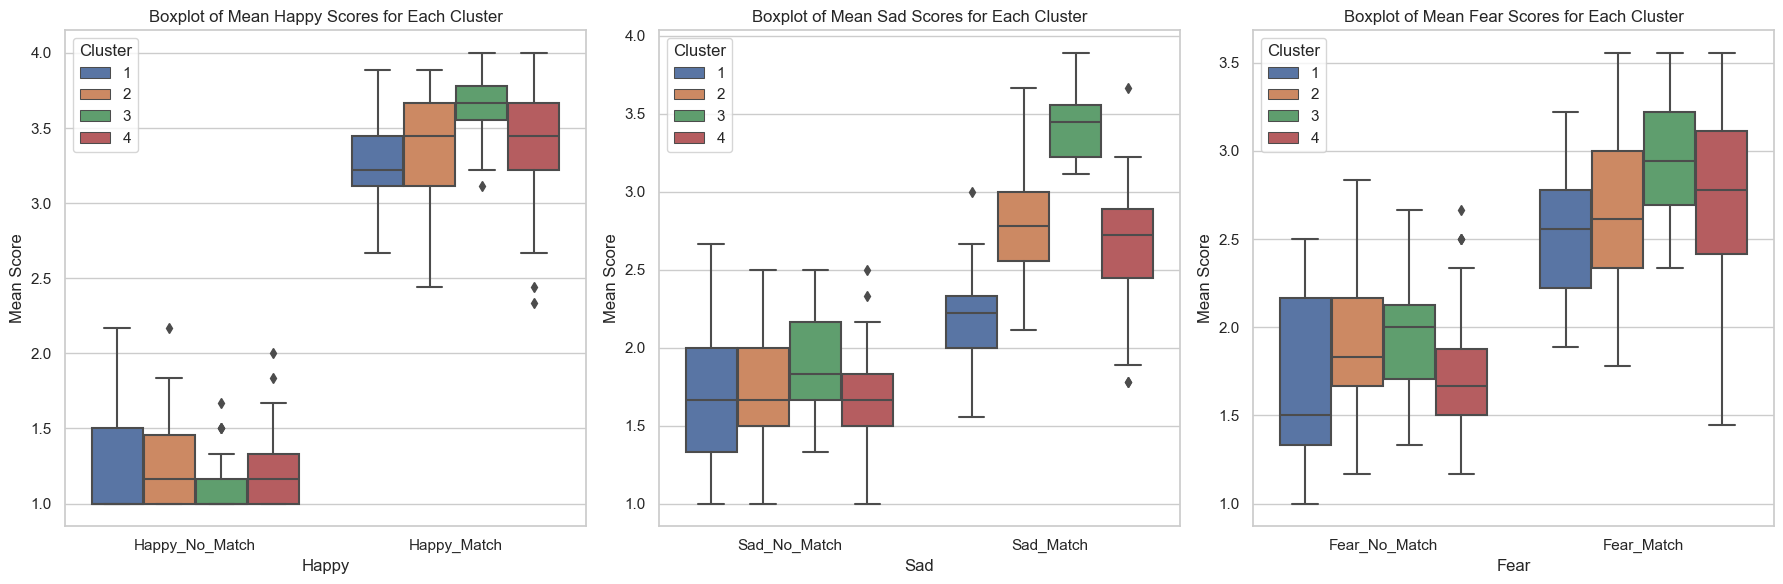

In [115]:
#Boxplots tasks
create_boxplots(data,cluster_data_sad1)


#### Sad No Match

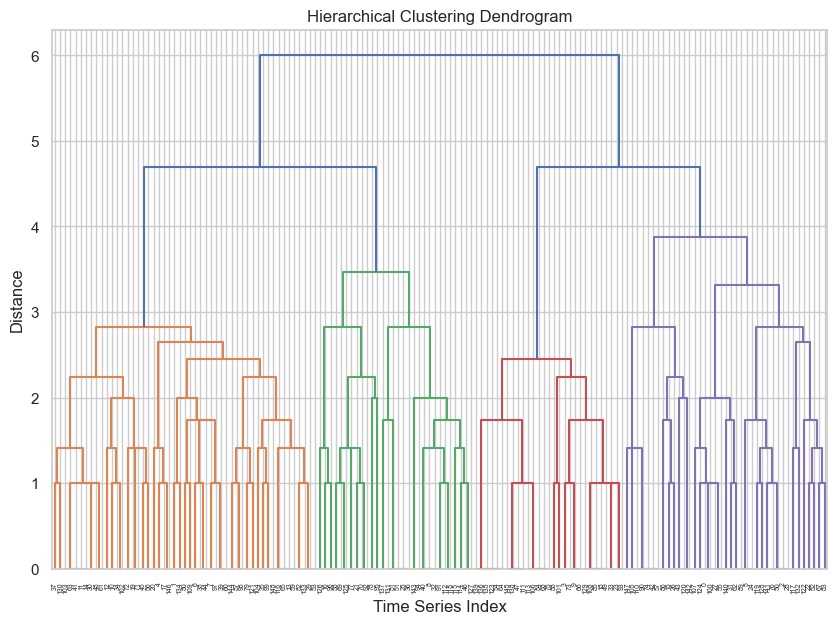

In [116]:
time_series_data = temporal_sad_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix_sad0 = dtw.distance_matrix_fast(time_series_data)

distance_matrix_sad0 = distance_matrix_sad0.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix_sad0)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [117]:
cluster_data_sad0 = utils.create_cluster_df(Z, 4, temporal_sad_0)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_sad0["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_sad0["clusters"]))



Silhouette score: 0.007553423205880923
Davies-Bouldin score: 4.9131225857099


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\utils.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_happy_match


In [118]:
sns.set(style="whitegrid")

    
name_output = f"time_series_sad_no_match.docx"


new_data = pd.merge(scales.copy(),cluster_data_sad0.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID",axis=1,inplace=True)
numeric_columns = new_data.select_dtypes(include=[np.number]).columns
columns_to_select = ['EPRIME_CODE'] + list(numeric_columns) + ["ERQ_ES"] + ["UPPSP_PMD"]
new_data = new_data[new_data["clusters"] != -1]

# Selecting all numeric columns along with "Subject"
filtered_df = new_data[columns_to_select]
cols_to_drop = filtered_df.columns[filtered_df.isnull().sum() > 50]
filtered_df = filtered_df.drop(columns=cols_to_drop).copy()
filtered_df.drop("Age", axis=1, inplace=True)


doc = Document()
size_clust = np.unique(new_data["clusters"], return_counts=True)[1]

for idx, group in enumerate(list_metrics):
    # Add group name to the document
    doc.add_paragraph(f"Group {idx + 1}: {', '.join(group)}")

    # Select columns belonging to the group
    columns_to_plot = ['clusters'] + group
    group_df = filtered_df[columns_to_plot]

    # Melt the dataframe
    melted_df = pd.melt(group_df, id_vars=['clusters'], value_vars=group,
                        var_name='Variable', value_name='Mean_Score')
    
    num_cols = len(group)
    for i, variable in enumerate(group):
        # Create a new figure for each variable
        plt.figure(figsize=(8, 6))
        ax = plt.gca()

        # Plot boxplot for the current variable
        sns.boxplot(x='clusters', y='Mean_Score', data=melted_df[melted_df['Variable'] == variable], ax=ax)
        ax.set_title(f'Boxplot for {variable}')
        ax.set_xlabel('Clusters')
        ax.set_ylabel('Mean Score')
        ax.grid(True)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

        # Calculate mean
        means = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].mean()
        stats = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].agg(['size', 'mean', 'std'])
        
        # Add text annotation for mean below the boxplot
        for cluster, mean in enumerate(means):
            ax.text(cluster, mean, f'{mean:.2f}', ha='center', va='top', color='red')

        plt.tight_layout()
        plot_filename = f'plot_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(plot_filename)
        plt.close()

        # Generate table for statistics
        stats.reset_index(inplace=True)
        stats["clusters"] = stats["clusters"]
        stats["mean"] = stats["mean"].round(2)
        stats["std"] = stats["std"].round(2)
        stats['SE of Cluster'] = (stats['std'] / np.sqrt(stats['size'])).round(2)
        stats['size'] = size_clust

        stats.columns = ["Number of Cluster", "Size of Cluster", "Mean of Cluster", "Standard Deviation of Cluster",
                         "SE of Cluster"]

        plt.figure(figsize=(8, 2))
        table = plt.table(cellText=stats.drop("Standard Deviation of Cluster", axis=1).values,
                          colLabels=stats.drop("Standard Deviation of Cluster", axis=1).columns,
                          cellLoc='center',
                          loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1)
        table.auto_set_column_width([i for i in range(len(stats.columns))])
        plt.axis('off')
        plt.title(f'Statistics for {variable}')
        table_filename = f'table_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(table_filename)
        plt.close()
        
            # Add plot and table to the Word document in the same row
        table_cell = doc.add_table(rows=1, cols=2)
        table_row = table_cell.rows[0]
        cell1 = table_row.cells[0]
        cell2 = table_row.cells[1]
        
        cell1.paragraphs[0].add_run().add_picture(plot_filename, width=Inches(3))  # Adjust width as needed
        cell2.paragraphs[0].add_run().add_picture(table_filename, width=Inches(3))  # Adjust width as 
doc.save(name_output)


In [119]:
export_df = cluster_data_sad0.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_sad_non_match_clusters.xlsx'
export_df.to_excel(name_excel, index=False)


In [120]:
# Scales Metrics
cluster_metrics_sad0 = create_metrics_cluster_df(cluster_data_sad0,scales)
cluster_metrics_sad0


,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,ZKPQ_ACT_mean,ZKPQ_SY_mean,ZKPQ_IMPSS_mean,ZKPQ_AGG_HOST_mean,ZKPQ_INFREQ_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,33.06,20.51,4.94,3.07,8.53,10.20,11.14,7.37,7.33,21.25,...,7.85,6.48,9.67,6.52,1.48,1.94,2.62,2.00,2.12,2.58
2,31.23,19.83,5.05,3.28,8.70,9.93,10.30,7.13,7.07,21.83,...,8.10,6.15,8.05,6.52,1.62,2.95,3.11,2.40,2.75,2.50
3,31.86,20.45,4.80,3.00,9.48,9.86,11.10,7.59,6.93,22.45,...,7.67,7.05,8.38,6.43,1.81,2.32,2.68,1.68,1.36,2.05
4,36.05,20.13,4.77,2.83,9.05,9.33,10.72,7.53,6.74,21.33,...,9.12,8.65,9.24,7.38,1.36,2.10,2.43,1.70,1.37,1.80


In [121]:
#Means tasks
create_mean_tasks(data,cluster_data_sad0)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,4.0,1.264957,3.524217,1.811966,2.840456,1.982906,2.760684
1,1.0,1.215686,3.418301,1.764706,2.825708,1.754902,2.742919
2,3.0,1.189655,3.268199,1.339080,2.574713,1.632184,2.513410
3,2.0,1.166667,3.440741,1.933333,2.770370,1.822222,2.788889


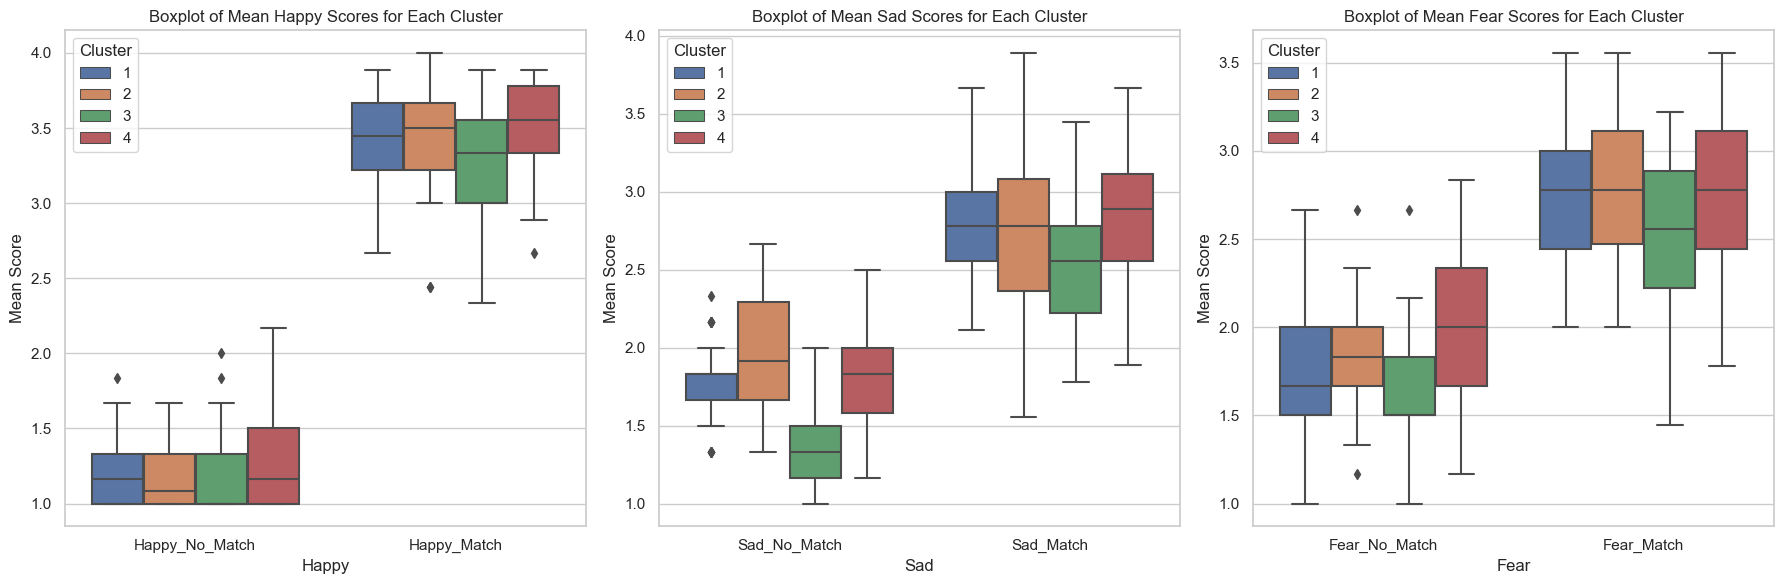

In [122]:
#Boxplots tasks
create_boxplots(data,cluster_data_sad0)


## Cluster averaged sum of distances

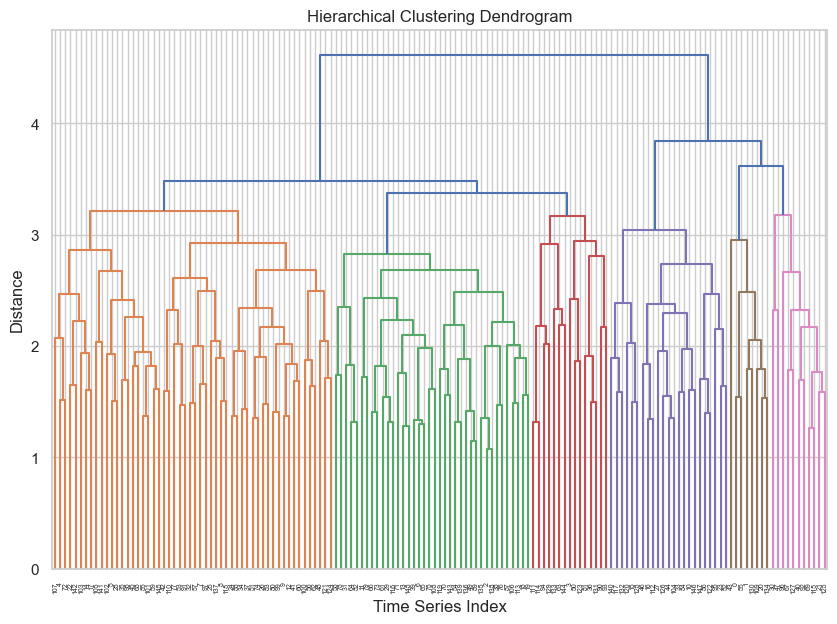

In [123]:
average_distance_matrix = (distance_matrix_fear1+distance_matrix_fear0+distance_matrix_happy0+distance_matrix_happy1+distance_matrix_sad0+distance_matrix_sad1)/6
condensed_dist_matrix = squareform(average_distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [124]:
cluster_data_average = utils.create_cluster_df(Z, 6, data)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_average["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_average["clusters"]))


Silhouette score: -0.03298049690416892
Davies-Bouldin score: 10.380101496271054


In [125]:
sns.set(style="whitegrid")

    
name_output = f"time_series_all.docx"


new_data = pd.merge(scales.copy(),cluster_data_average.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID",axis=1,inplace=True)
numeric_columns = new_data.select_dtypes(include=[np.number]).columns
columns_to_select = ['EPRIME_CODE'] + list(numeric_columns) + ["ERQ_ES"] + ["UPPSP_PMD"]
new_data = new_data[new_data["clusters"] != -1]

# Selecting all numeric columns along with "Subject"
filtered_df = new_data[columns_to_select]
cols_to_drop = filtered_df.columns[filtered_df.isnull().sum() > 50]
filtered_df = filtered_df.drop(columns=cols_to_drop).copy()
filtered_df.drop("Age", axis=1, inplace=True)


doc = Document()
size_clust = np.unique(new_data["clusters"], return_counts=True)[1]

for idx, group in enumerate(list_metrics):
    # Add group name to the document
    doc.add_paragraph(f"Group {idx + 1}: {', '.join(group)}")

    # Select columns belonging to the group
    columns_to_plot = ['clusters'] + group
    group_df = filtered_df[columns_to_plot]

    # Melt the dataframe
    melted_df = pd.melt(group_df, id_vars=['clusters'], value_vars=group,
                        var_name='Variable', value_name='Mean_Score')
    
    num_cols = len(group)
    for i, variable in enumerate(group):
        # Create a new figure for each variable
        plt.figure(figsize=(8, 6))
        ax = plt.gca()

        # Plot boxplot for the current variable
        sns.boxplot(x='clusters', y='Mean_Score', data=melted_df[melted_df['Variable'] == variable], ax=ax)
        ax.set_title(f'Boxplot for {variable}')
        ax.set_xlabel('Clusters')
        ax.set_ylabel('Mean Score')
        ax.grid(True)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

        # Calculate mean
        means = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].mean()
        stats = melted_df[melted_df['Variable'] == variable].groupby('clusters')['Mean_Score'].agg(['size', 'mean', 'std'])
        
        # Add text annotation for mean below the boxplot
        for cluster, mean in enumerate(means):
            ax.text(cluster, mean, f'{mean:.2f}', ha='center', va='top', color='red')

        plt.tight_layout()
        plot_filename = f'plot_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(plot_filename)
        plt.close()

        # Generate table for statistics
        stats.reset_index(inplace=True)
        stats["clusters"] = stats["clusters"]
        stats["mean"] = stats["mean"].round(2)
        stats["std"] = stats["std"].round(2)
        stats['SE of Cluster'] = (stats['std'] / np.sqrt(stats['size'])).round(2)
        stats['size'] = size_clust

        stats.columns = ["Number of Cluster", "Size of Cluster", "Mean of Cluster", "Standard Deviation of Cluster",
                         "SE of Cluster"]

        plt.figure(figsize=(8, 2))
        table = plt.table(cellText=stats.drop("Standard Deviation of Cluster", axis=1).values,
                          colLabels=stats.drop("Standard Deviation of Cluster", axis=1).columns,
                          cellLoc='center',
                          loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1)
        table.auto_set_column_width([i for i in range(len(stats.columns))])
        plt.axis('off')
        plt.title(f'Statistics for {variable}')
        table_filename = f'table_{idx}_{i}.png'  # Generate unique filename
        plt.savefig(table_filename)
        plt.close()
        
            # Add plot and table to the Word document in the same row
        table_cell = doc.add_table(rows=1, cols=2)
        table_row = table_cell.rows[0]
        cell1 = table_row.cells[0]
        cell2 = table_row.cells[1]
        
        cell1.paragraphs[0].add_run().add_picture(plot_filename, width=Inches(3))  # Adjust width as needed
        cell2.paragraphs[0].add_run().add_picture(table_filename, width=Inches(3))  # Adjust width as 
doc.save(name_output)


In [126]:
export_df = cluster_data_average.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_all_emotions_clusters.xlsx'
export_df.to_excel(name_excel, index=False)


In [127]:
# Scales Metrics
cluster_metrics_average = create_metrics_cluster_df(cluster_data_average,scales)
cluster_metrics_average["length_cluster"] = np.unique(cluster_data_average["clusters"],return_counts=True)[1]
cluster_metrics_average.insert(0, 'length_cluster', cluster_metrics_average.pop('length_cluster'))
cluster_metrics_average

,length_cluster,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,...,ZKPQ_ACT_mean,ZKPQ_SY_mean,ZKPQ_IMPSS_mean,ZKPQ_AGG_HOST_mean,ZKPQ_INFREQ_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,54,31.94,19.89,4.86,3.44,8.87,9.76,11.13,7.35,7.19,...,8.10,7.10,9.93,6.90,1.55,2.46,2.62,1.73,1.94,2.33
2,38,32.76,18.68,4.87,2.49,8.74,9.76,11.05,7.71,7.34,...,7.32,6.92,8.92,6.64,1.54,1.70,2.60,1.93,1.70,1.70
3,15,30.93,21.20,4.76,3.42,9.53,9.93,10.00,7.67,7.47,...,8.25,7.58,9.08,7.17,1.67,3.18,2.91,2.73,3.09,3.55
4,23,37.57,21.74,5.22,2.71,8.74,9.39,10.57,6.82,6.30,...,8.93,7.43,7.86,6.50,1.57,2.50,2.94,1.78,1.44,2.44
5,8,35.62,23.75,4.79,3.28,9.38,10.50,10.88,6.50,5.75,...,7.75,8.25,7.75,5.00,2.50,1.20,2.60,3.20,1.40,1.60
6,11,33.64,20.64,4.68,2.91,8.55,11.00,10.55,8.09,7.27,...,10.43,5.43,7.00,6.86,0.86,1.38,2.14,1.62,2.12,2.38


In [128]:
#Means tasks
create_mean_tasks(data,cluster_data_average)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,5.0,1.500000,3.652778,2.083333,3.416667,2.187500,3.138889
1,2.0,1.021930,3.342105,1.517544,2.634503,1.491228,2.453216
2,3.0,1.466667,3.074074,1.588889,2.333333,1.900000,2.444444
3,1.0,1.311728,3.500000,1.740741,2.699588,1.802469,2.761317
4,4.0,1.028986,3.603865,1.869565,3.120773,2.057971,2.932367
5,6.0,1.227273,3.232323,2.030303,2.969697,1.954545,2.959596


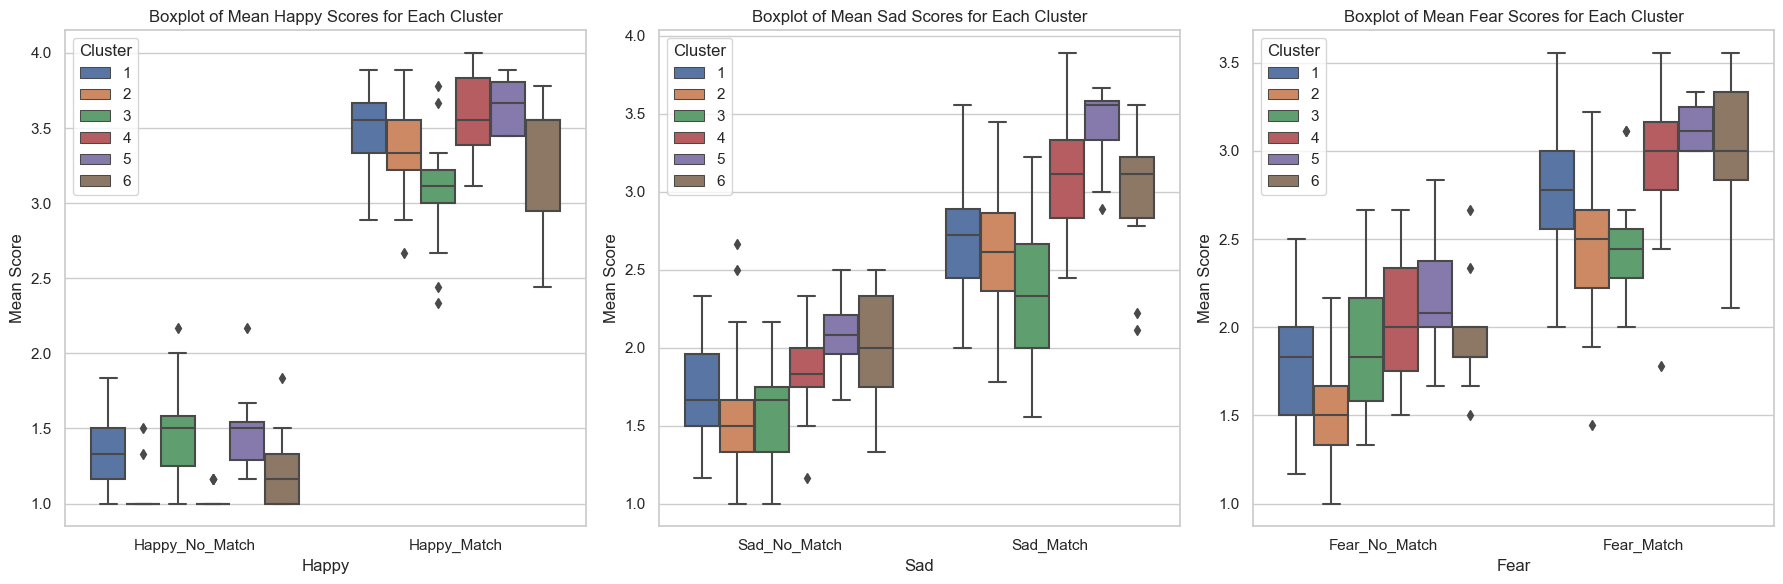

In [129]:
#Boxplots tasks
create_boxplots(data,cluster_data_average)


### Prediction on Rating0 differenciated by Match and Emotion on RETOS & BEBRASK using Moving Average Time Series


In [130]:
data = pd.read_excel("RETOS_BEBRASK_Rating0_Time_MA_Series.xlsx")
data

,Subject ID,Happy_0_MA_0,Happy_0_MA_1,Happy_0_MA_2,Happy_0_MA_3,Happy_1_MA_0,Happy_1_MA_1,Happy_1_MA_2,Happy_1_MA_3,Happy_1_MA_4,...,Fear_0_MA_1,Fear_0_MA_2,Fear_0_MA_3,Fear_1_MA_0,Fear_1_MA_1,Fear_1_MA_2,Fear_1_MA_3,Fear_1_MA_4,Fear_1_MA_5,Fear_1_MA_6
0,PREDWELL_RETOS-1001-1,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.666667,3.666667,3.666667,...,1.666667,1.000000,1.666667,2.666667,2.000000,2.666667,3.000000,3.333333,3.333333,3.333333
1,PREDWELL_RETOS-1002-1,1.666667,1.666667,1.666667,1.000000,3.666667,4.000000,4.000000,4.000000,3.666667,...,3.000000,2.333333,1.666667,2.333333,2.666667,3.333333,3.666667,3.000000,3.000000,3.000000
2,PREDWELL_RETOS-1003-1,1.000000,1.000000,1.000000,1.000000,3.333333,3.666667,3.666667,3.333333,3.000000,...,1.333333,1.666667,2.000000,2.333333,2.333333,2.333333,2.000000,1.666667,2.000000,2.333333
3,PREDWELL_RETOS-1004-1,1.666667,2.333333,2.666667,2.000000,2.333333,2.333333,1.333333,1.666667,2.333333,...,1.333333,2.333333,2.333333,3.000000,2.666667,2.333333,2.333333,2.666667,2.000000,2.000000
4,PREDWELL_RETOS-1005-1,1.000000,1.000000,1.333333,1.333333,3.666667,3.333333,3.666667,3.333333,3.666667,...,2.333333,3.000000,2.000000,2.000000,2.333333,2.666667,3.000000,3.333333,3.333333,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,PREDWELL_RETOS-5-1,1.666667,1.333333,1.000000,1.000000,3.666667,3.333333,3.000000,2.666667,3.333333,...,2.666667,2.000000,1.000000,2.000000,2.333333,3.333333,3.000000,3.333333,2.666667,2.333333
145,PREDWELL_RETOS-6-1,1.333333,1.333333,1.000000,1.000000,3.333333,2.666667,2.666667,2.666667,3.666667,...,2.666667,2.666667,2.000000,2.000000,2.666667,2.666667,3.000000,2.333333,3.000000,3.333333
146,PREDWELL_RETOS-7-1,1.000000,1.000000,1.000000,1.000000,3.000000,3.333333,3.000000,3.666667,3.333333,...,2.000000,1.666667,2.666667,2.333333,2.333333,3.333333,3.000000,3.000000,3.000000,3.000000
147,PREDWELL_RETOS-8-1,1.000000,1.000000,1.000000,1.000000,3.000000,2.333333,2.000000,2.666667,3.333333,...,3.000000,3.000000,2.666667,3.333333,3.333333,3.000000,3.000000,2.666667,2.333333,2.000000


In [131]:
temporal_happy_0 = data[["Subject ID","Happy_0_MA_0","Happy_0_MA_1","Happy_0_MA_2","Happy_0_MA_3"]]
temporal_happy_1 = data[["Subject ID","Happy_1_MA_0","Happy_1_MA_1","Happy_1_MA_2","Happy_1_MA_3","Happy_1_MA_4","Happy_1_MA_5","Happy_1_MA_6"]]
temporal_fear_0 = data[["Subject ID","Fear_0_MA_0","Fear_0_MA_1","Fear_0_MA_2","Fear_0_MA_3"]]
temporal_fear_1 = data[["Subject ID","Fear_1_MA_0","Fear_1_MA_1","Fear_1_MA_2","Fear_1_MA_3","Fear_1_MA_4","Fear_1_MA_5","Fear_1_MA_6"]]
temporal_sad_0 = data[["Subject ID","Sad_0_MA_0","Sad_0_MA_1","Sad_0_MA_2","Sad_0_MA_3"]]
temporal_sad_1 = data[["Subject ID","Sad_1_MA_0","Sad_1_MA_1","Sad_1_MA_2","Sad_1_MA_3","Sad_1_MA_4","Sad_1_MA_5","Sad_1_MA_6"]]

## Hierarchical Clustering using Dynamic Time Warping

#### Happy Match

In [132]:
time_series_data = temporal_happy_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

KeyboardInterrupt: 

In [ ]:
clusters_happy_match = fcluster(Z, 2, criterion='maxclust')


#### Happy Non Match

In [ ]:
time_series_data = temporal_happy_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
clusters_happy_non_match = fcluster(Z, 3, criterion='maxclust')

#### Fear Match

In [ ]:
time_series_data = temporal_fear_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
clusters_fear_match = fcluster(Z, 3, criterion='maxclust')


#### Fear Non Match


In [ ]:
time_series_data = temporal_fear_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()



In [ ]:
clusters_fear_no_match = fcluster(Z, 3, criterion='maxclust')

#### Sad Match

In [ ]:
time_series_data = temporal_sad_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
clusters_sad_match = fcluster(Z, 3, criterion='maxclust')


#### Sad No Match

In [ ]:
time_series_data = temporal_sad_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
clusters_sad_no_match = fcluster(Z, 3, criterion='maxclust')